In [9]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [10]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])


decoded_review = ' '.join([reverse_word_index.get(i - 3, '') for i in train_data[1]])
decoded_review

' generale de banque sa lt  br and lt heller overseas corp of chicago have each taken 50 pct stakes in  company sa  factors generale de banque said in a statement it gave no financial details of the transaction sa   turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [11]:
import numpy as np

def vectorize_data(input, dims = 10000):
    arr = np.zeros(shape=(len(input), dims))

    for i, seq in enumerate(input):
        arr[i, seq] = 1
    
    return arr

train_data = vectorize_data(train_data)
test_data = vectorize_data(test_data)

train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')

In [12]:
train_data.shape

(8982, 10000)

In [22]:
from keras import models, layers
from keras import optimizers, losses

network = models.Sequential()

network.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

network.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [14]:
val_data = train_data[:1000]
train_data = train_data[1000:]

val_labels = train_labels[:1000]
train_labels = train_labels[1000:]

In [23]:
history = network.fit(train_data, train_labels, batch_size=512, epochs=20, validation_data=(val_data, val_labels))

Epoch 1/20
16/16 [==============================] - 2s 37ms/step - loss: 2.8251 - accuracy: 0.5188 - val_loss: 1.9242 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 1.5740 - accuracy: 0.6864 - val_loss: 1.3985 - val_accuracy: 0.6860
Epoch 3/20
16/16 [==============================] - 0s 28ms/step - loss: 1.1439 - accuracy: 0.7519 - val_loss: 1.1769 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.8979 - accuracy: 0.8135 - val_loss: 1.0577 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 27ms/step - loss: 0.7127 - accuracy: 0.8569 - val_loss: 0.9887 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 0.5654 - accuracy: 0.8860 - val_loss: 0.9318 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 28ms/step - loss: 0.4513 - accuracy: 0.9105 - val_loss: 0.8928 - val_accuracy: 0.8220
Epoch 8/20
16

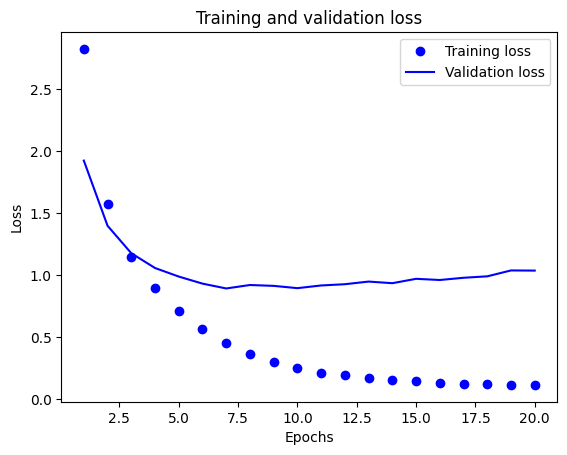

In [26]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

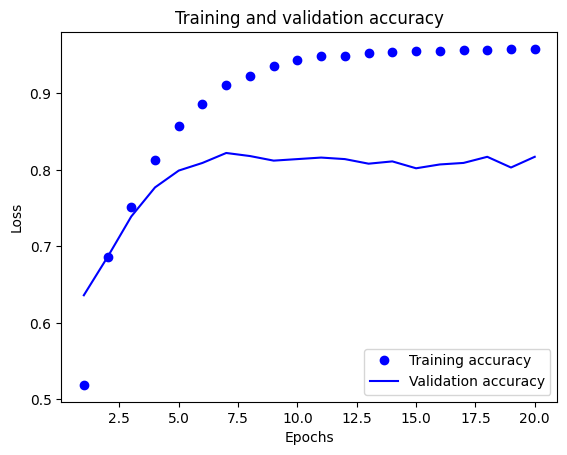

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [30]:
from keras import models, layers
from keras import optimizers, losses

network_2 = models.Sequential()

network_2.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
network_2.add(layers.Dense(64, activation='relu'))
network_2.add(layers.Dense(46, activation='softmax'))

network_2.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [31]:
history_2 = network_2.fit(train_data, train_labels, batch_size=512, epochs=8, validation_data=(val_data, val_labels))

Epoch 1/8
16/16 [==============================] - 1s 52ms/step - loss: 2.7313 - accuracy: 0.5301 - val_loss: 1.8099 - val_accuracy: 0.6420
Epoch 2/8
16/16 [==============================] - 1s 37ms/step - loss: 1.4526 - accuracy: 0.7012 - val_loss: 1.3125 - val_accuracy: 0.7240
Epoch 3/8
16/16 [==============================] - 1s 37ms/step - loss: 1.0595 - accuracy: 0.7779 - val_loss: 1.1247 - val_accuracy: 0.7620
Epoch 4/8
16/16 [==============================] - 1s 33ms/step - loss: 0.8320 - accuracy: 0.8244 - val_loss: 1.0209 - val_accuracy: 0.7790
Epoch 5/8
16/16 [==============================] - 1s 34ms/step - loss: 0.6634 - accuracy: 0.8604 - val_loss: 0.9608 - val_accuracy: 0.8080
Epoch 6/8
16/16 [==============================] - 0s 30ms/step - loss: 0.5276 - accuracy: 0.8900 - val_loss: 0.9682 - val_accuracy: 0.7920
Epoch 7/8
16/16 [==============================] - 0s 30ms/step - loss: 0.4250 - accuracy: 0.9112 - val_loss: 0.9437 - val_accuracy: 0.8030
Epoch 8/8
16/16 [===

In [32]:
results = network_2.evaluate(test_data, test_labels)

results

71/71 [==============================] - 0s 3ms/step - loss: 0.9678 - accuracy: 0.7867


[0.9677789807319641, 0.7867319583892822]